In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'Data', 'heart-disease-prediction.ipynb']


In [2]:
dataset = pd.read_csv("Data/heart.csv")

In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2,1
258,62,0,0,150,244,0,1,154,1,1.4,1,0,2,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0


In [6]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [9]:
# Here's a summary of the column meanings based on the information you provided:

# age: The age of the individual.
# sex: The sex of the individual, encoded as 1 for male and 0 for female.
# cp: The type of chest pain experienced, with specific integer values representing:
# 1: Typical angina
# 2: Atypical angina
# 3: Non-anginal pain
# 4: Asymptomatic
# trestbps: The resting blood pressure.
# chol: The serum cholesterol level in mg/dl.
# fbs: Indicates if fasting blood sugar is greater than 120 mg/dl. The encoding (likely 1 for true, 0 for false) is implied.
# restecg: The results of the resting electrocardiogram, with integer values 0, 1, and 2 representing different findings.
# thalach: The maximum heart rate achieved during exercise.
# exang: Indicates if exercise induced angina. The encoding (likely 1 for true, 0 for false) is implied.
# oldpeak: The ST depression induced by exercise relative to rest.
# slope: The slope of the peak exercise ST segment. The integer values would represent different slope types (e.g., upsloping, flat, downsloping).
# ca: The number of major vessels (0 to 3) colored by fluoroscopy.
# thal: Thalassemia, with specific integer values representing:
# 3: Normal
# 6: Fixed defect
# 7: Reversible defect
# target: (Based on the initial context of training data for heart disease prediction) This is the target variable indicating the presence of heart disease (likely 1 for presence, 0 for absence).

In [10]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [11]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [12]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

1    165
0    138
Name: target, dtype: int64


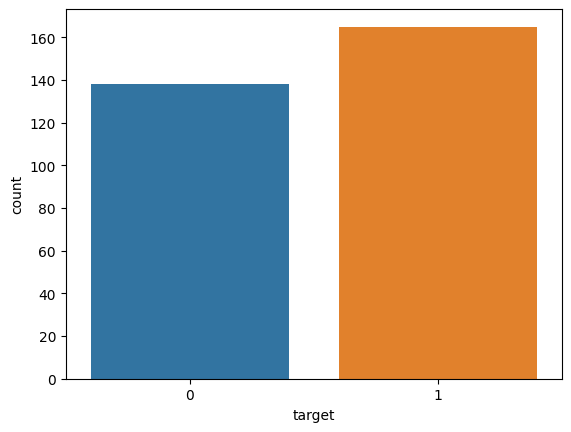

In [13]:

y = dataset["target"]

sns.countplot(x=y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [14]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


In [15]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

In [16]:
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

<AxesSubplot:xlabel='sex', ylabel='target'>

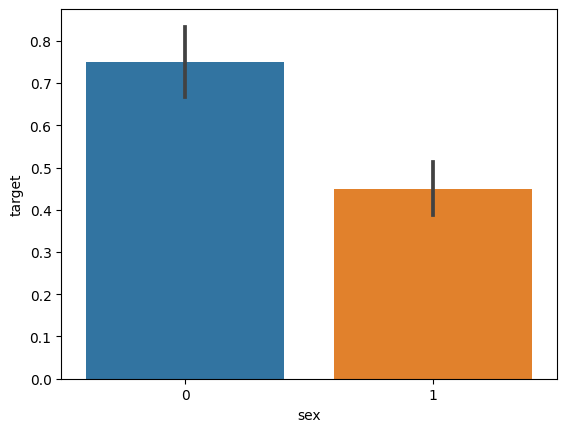

In [17]:
y = dataset["target"]
sns.barplot(x=dataset["sex"],y=y)

In [18]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

<AxesSubplot:xlabel='restecg', ylabel='target'>

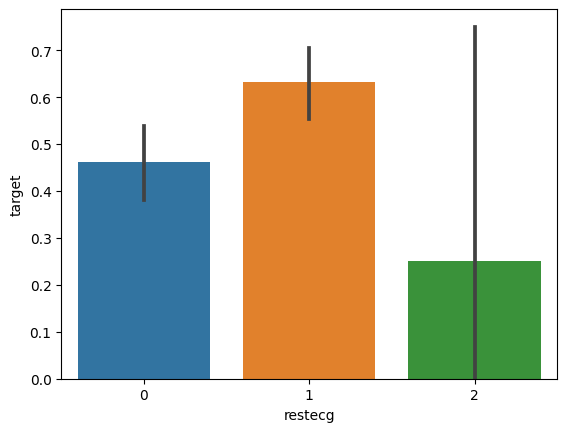

In [19]:
sns.barplot(x=dataset["restecg"],y=y)

In [20]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='exang', ylabel='target'>

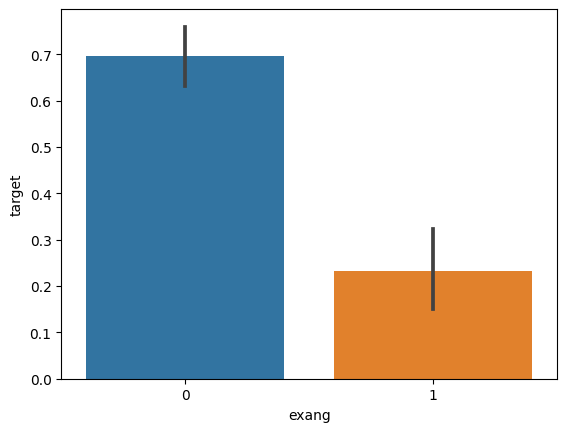

In [21]:
sns.barplot(x=dataset["exang"],y=y)

In [22]:
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

<AxesSubplot:xlabel='slope', ylabel='target'>

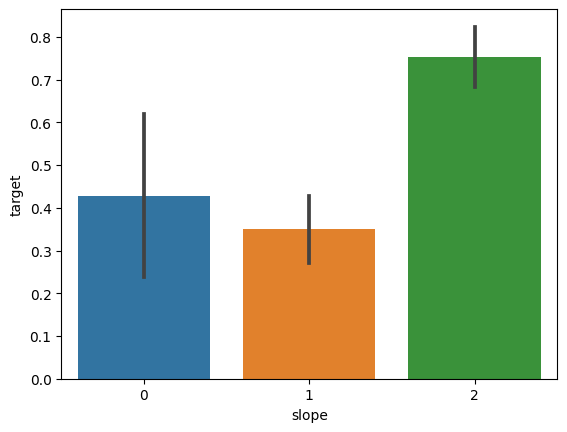

In [23]:
sns.barplot(x=dataset["slope"],y=y)

In [24]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

<AxesSubplot:xlabel='ca', ylabel='count'>

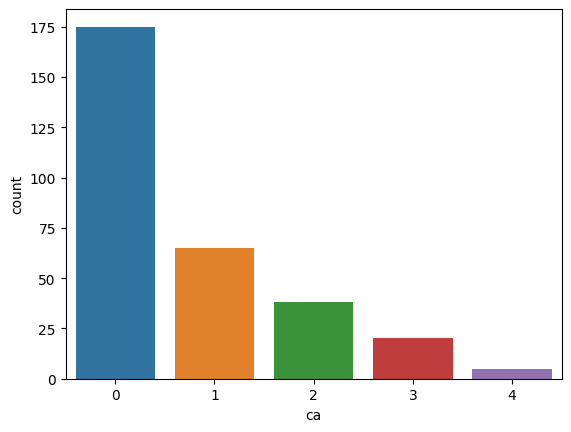

In [25]:
sns.countplot(x=dataset["ca"])


<AxesSubplot:xlabel='ca', ylabel='target'>

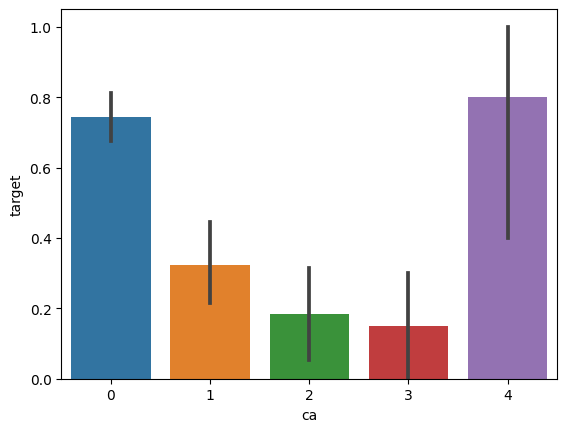

In [26]:
sns.barplot(x=dataset["ca"],y=y)

In [27]:
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

<AxesSubplot:xlabel='thal', ylabel='target'>

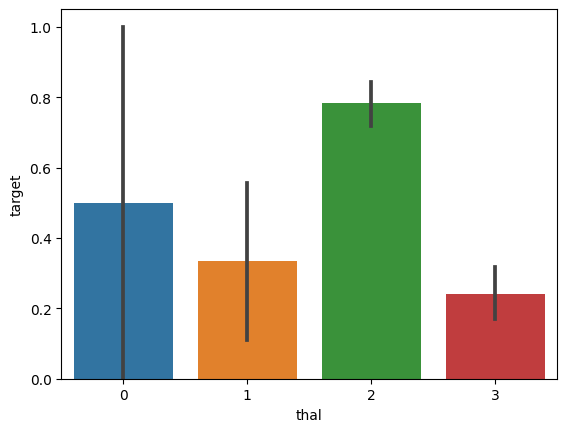

In [28]:
sns.barplot(x=dataset["thal"],y=y)


<AxesSubplot:ylabel='Density'>

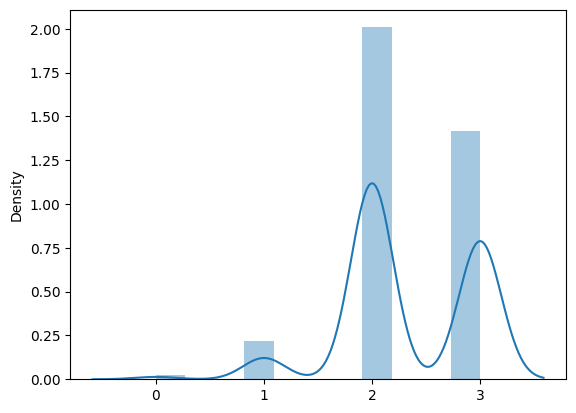

In [29]:
sns.distplot(x=dataset["thal"])

In [30]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [31]:
X_train.shape

(242, 13)

In [32]:
X_test.shape

(61, 13)

In [33]:
Y_train.shape

(242,)

In [34]:
Y_test.shape

(61,)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [37]:
Y_pred_lr.shape

(61,)

In [38]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [39]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [40]:
Y_pred_nb.shape

(61,)

In [41]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [42]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [43]:
Y_pred_svm.shape

(61,)

In [44]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [46]:
Y_pred_knn.shape

(61,)

In [47]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


In [48]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [49]:
print(Y_pred_dt.shape)

(61,)


In [50]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


In [51]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [52]:
Y_pred_rf.shape

(61,)

In [53]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.16 %


In [54]:
import sys
print(sys.executable)


C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\python.exe


In [55]:
pip show xgboost


Name: xgboost
Version: 3.0.2
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: c:\users\lenovo\appdata\local\programs\python\python310\lib\site-packages
Requires: numpy, scipy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [56]:

import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [57]:
Y_pred_xgb.shape


(61,)

In [58]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 83.61 %


In [59]:
from keras.models import Sequential
from keras.layers import Dense


In [60]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [61]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
8/8 [==============================] - 1s 7ms/step - loss: 48.5033 - accuracy: 0.5413
Epoch 2/300
8/8 [==============================] - 0s 4ms/step - loss: 42.5498 - accuracy: 0.5413
Epoch 3/300
8/8 [==============================] - 0s 4ms/step - loss: 35.9943 - accuracy: 0.5413
Epoch 4/300
8/8 [==============================] - 0s 2ms/step - loss: 29.3966 - accuracy: 0.5413
Epoch 5/300
8/8 [==============================] - 0s 2ms/step - loss: 22.7017 - accuracy: 0.5413
Epoch 6/300
8/8 [==============================] - 0s 2ms/step - loss: 15.4712 - accuracy: 0.5744
Epoch 7/300
8/8 [==============================] - 0s 4ms/step - loss: 9.7258 - accuracy: 0.6074
Epoch 8/300
8/8 [==============================] - 0s 4ms/step - loss: 5.9413 - accuracy: 0.6364
Epoch 9/300
8/8 [==============================] - 0s 4ms/step - loss: 4.7055 - accuracy: 0.6488
Epoch 10/300
8/8 [==============================] - 0s 2ms/step - loss: 4.7951 - accuracy: 0.6446
Epoch 11/300
8/8 [=====

8/8 [==============================] - 0s 4ms/step - loss: 1.5350 - accuracy: 0.7273
Epoch 85/300
8/8 [==============================] - 0s 4ms/step - loss: 1.5145 - accuracy: 0.7231
Epoch 86/300
8/8 [==============================] - 0s 2ms/step - loss: 1.4986 - accuracy: 0.7273
Epoch 87/300
8/8 [==============================] - 0s 2ms/step - loss: 1.4658 - accuracy: 0.7231
Epoch 88/300
8/8 [==============================] - 0s 2ms/step - loss: 1.4513 - accuracy: 0.7314
Epoch 89/300
8/8 [==============================] - 0s 2ms/step - loss: 1.4256 - accuracy: 0.7314
Epoch 90/300
8/8 [==============================] - 0s 4ms/step - loss: 1.4029 - accuracy: 0.7355
Epoch 91/300
8/8 [==============================] - 0s 4ms/step - loss: 1.3816 - accuracy: 0.7314
Epoch 92/300
8/8 [==============================] - 0s 2ms/step - loss: 1.3648 - accuracy: 0.7273
Epoch 93/300
8/8 [==============================] - 0s 2ms/step - loss: 1.3622 - accuracy: 0.7355
Epoch 94/300
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.4362 - accuracy: 0.8058
Epoch 168/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.7975
Epoch 169/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.8058
Epoch 170/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4277 - accuracy: 0.8099
Epoch 171/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4242 - accuracy: 0.8099
Epoch 172/300
8/8 [==============================] - 0s 3ms/step - loss: 0.4239 - accuracy: 0.8099
Epoch 173/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4245 - accuracy: 0.8099
Epoch 174/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4274 - accuracy: 0.8099
Epoch 175/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.8140
Epoch 176/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4153 - accuracy: 0.8017
Epoch 177/300
8/8 [=====

8/8 [==============================] - 0s 4ms/step - loss: 0.3748 - accuracy: 0.8264
Epoch 250/300
8/8 [==============================] - 0s 4ms/step - loss: 0.3700 - accuracy: 0.8471
Epoch 251/300
8/8 [==============================] - 0s 4ms/step - loss: 0.3939 - accuracy: 0.8140
Epoch 252/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3844 - accuracy: 0.8182
Epoch 253/300
8/8 [==============================] - 0s 4ms/step - loss: 0.3714 - accuracy: 0.8264
Epoch 254/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3780 - accuracy: 0.8264
Epoch 255/300
8/8 [==============================] - 0s 6ms/step - loss: 0.3753 - accuracy: 0.8223
Epoch 256/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3699 - accuracy: 0.8223
Epoch 257/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3767 - accuracy: 0.8306
Epoch 258/300
8/8 [==============================] - 0s 4ms/step - loss: 0.3881 - accuracy: 0.8223
Epoch 259/300
8/8 [=====

In [62]:
Y_pred_nn = model.predict(X_test)


2/2 [==============================] - 0s 0s/step


In [63]:
Y_pred_nn.shape

(61, 1)

In [64]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [65]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11. 

The accuracy score achieved using Neural Network is: 81.97 %


In [66]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using XGBoost is: 83.61 %
The accuracy score achieved using Neural Network is: 81.97 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

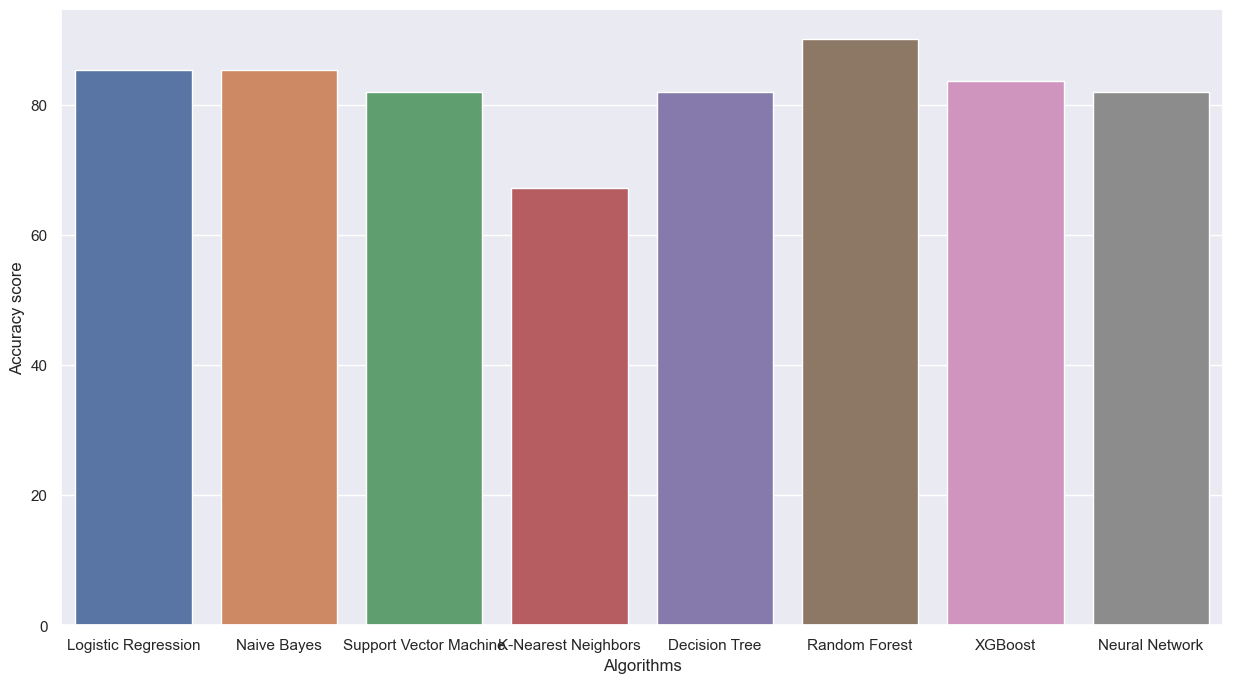

In [68]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)